In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def get_card():
    x=random.randint(1,13)
    return min(x,10)

In [3]:
def check_usable_ace(card):
    s=sum(card)
    ace=False
    for index in card:
        if index==1:
            ace=True
    return int(ace and s<=11)

In [4]:
def getsum(card):
    s=sum(card)
    for index in card:
        if(index==1):
            if s<=11:
                s+=10
    return int(s)

In [5]:
def get_possible_hand(sum_hand,ace):
    #state[0]:手牌和
    #state[1]:有无可用的A
    hands=[]
    if ace:
        sum_hand-=11
        hands.append(1)
        if sum_hand!=0:
            hands.append(sum_hand)
    else:
        while sum_hand:
            if sum_hand==11:
                hands.append(2)
                hands.append(9)
                sum_hand=0
            if sum_hand>10:
                hands.append(10)
                sum_hand-=10
            elif sum_hand>0:
                hands.append(sum_hand)
                sum_hand=0
    return hands

In [6]:
for i in range(11,22):
    for k in range(2):
        print(i,k,get_possible_hand(i,k),getsum(get_possible_hand(i,k)))

11 0 [2, 9] 11
11 1 [1] 11
12 0 [10, 2] 12
12 1 [1, 1] 12
13 0 [10, 3] 13
13 1 [1, 2] 13
14 0 [10, 4] 14
14 1 [1, 3] 14
15 0 [10, 5] 15
15 1 [1, 4] 15
16 0 [10, 6] 16
16 1 [1, 5] 16
17 0 [10, 7] 17
17 1 [1, 6] 17
18 0 [10, 8] 18
18 1 [1, 7] 18
19 0 [10, 9] 19
19 1 [1, 8] 19
20 0 [10, 10] 20
20 1 [1, 9] 20
21 0 [10, 2, 9] 21
21 1 [1, 10] 21


In [7]:
pi=np.zeros((22,11,2), dtype = int)
# pi:22*11*2,第一维为玩家的牌，第二维为庄家的牌，第三位为是否有可用的A
q=np.zeros((22,11,2,2), dtype = float)
# q:22*11*2*2,第一维为玩家的牌，第二维为庄家的牌，第三位为是否有可用的A，第四维代表动作
cnt=np.zeros((22,11,2,2), dtype = float)

In [8]:
def episode(start_state): #进行一幕
    #start_state 0:玩家手牌和,1:庄家名牌，2:玩家有无可用的A，3：玩家的初始动作
    dealer_card=[]
    dealer_card.append(start_state[1])
    dealer_card.append(get_card())
    
    player_state=[]
    
    player_card=get_possible_hand(start_state[0],start_state[2])
    reward=0
    
    action=start_state[3]
    
    player_now_state=[getsum(player_card),dealer_card[0],check_usable_ace(player_card),action]
    
    
    player_state.append(tuple(player_now_state)) #加入初始状态
        
    while action: #玩家要牌
        new_card=get_card()
        player_card.append(new_card)
        if(getsum(player_card)>21): #爆牌
            reward=-1
            break
        action=pi[getsum(player_card),dealer_card[0],check_usable_ace(player_card)]
        player_state.append(tuple([getsum(player_card),dealer_card[0],check_usable_ace(player_card),action]))
                
    if reward==-1:
        #print("player",player_card,player_sum,dealer_card,dealer_sum)
        return reward,player_state
    
    else: #庄家要牌
        while getsum(dealer_card)<17:
            new_card=get_card()
            dealer_card.append(new_card)
            if(getsum(dealer_card)>21): #庄家爆牌
                reward=1
                break
            
    if reward==1:
        #print("dealer",player_card,player_sum,dealer_card,dealer_sum)
        return reward,player_state
    
    else:
        dealer_sum=getsum(dealer_card)
        player_sum=getsum(player_card)
        #print("ok",player_card,player_sum,dealer_card,dealer_sum)
        if(dealer_sum>player_sum):
            return -1,player_state
        elif(dealer_sum==player_sum):
            return 0, player_state
        elif(dealer_sum<player_sum):
            return 1, player_state

In [9]:
def wk():
    episodes=0
    while True:
        for i in range(11,22):
            for j in range(1,11):
                for k in range(2):
                    for l in range(2):
                        reward,state=episode([i,j,k,l])
                        sz=len(state)
                        l=dict()
                        appear=[]
                        for index in state:
                            if index in l:
                                appear.append(False)
                            else:
                                appear.append(True)
                            l[index]=True
                        for index in range(sz-1,-1,-1):
                            if appear[index]:
                                cnt[state[index]]+=1
                                q[state[index]]+=1.0/cnt[state[index]]*(reward-q[state[index]])
                                pi[state[index][:2]]=np.argmax(q[state[index][:3]])
                                #print(state[i],state[i][:3],q[state[i][:3]],np.argmax(q[state[i][:3]]))
        if((episodes+1)==20000):
            break
        if ((episodes+1)%1000==0):
            print("episode {} done!".format(episodes+1))
        episodes+=1

In [10]:
wk()

episode 1000 done!
episode 2000 done!
episode 3000 done!
episode 4000 done!
episode 5000 done!
episode 6000 done!
episode 7000 done!
episode 8000 done!
episode 9000 done!
episode 10000 done!
episode 11000 done!
episode 12000 done!
episode 13000 done!
episode 14000 done!
episode 15000 done!
episode 16000 done!
episode 17000 done!
episode 18000 done!
episode 19000 done!


Text(0.5, 0.92, 'no usable ace, 20000 iterations')

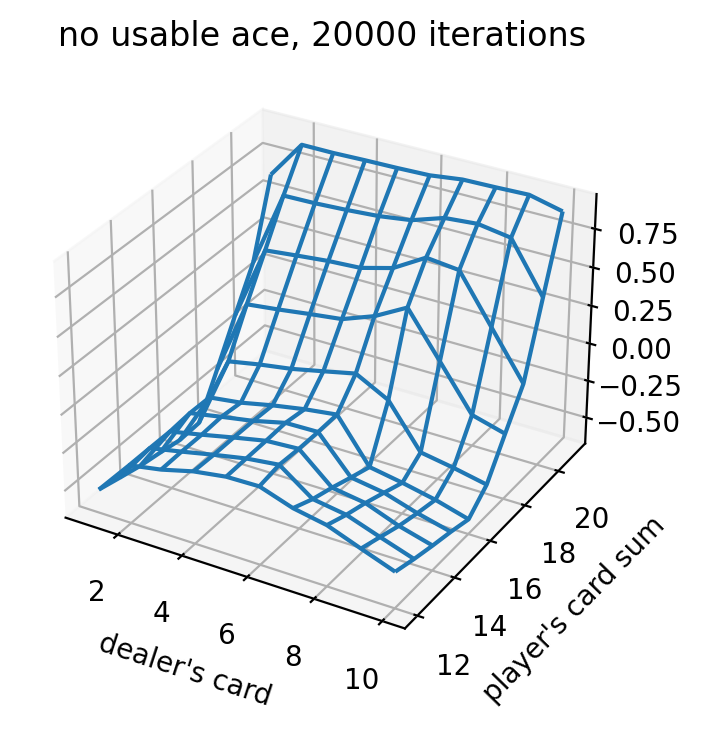

In [11]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
x=np.empty([10,10])
y=np.empty([10,10])
z=np.empty([10,10])
for i in range(12,22):
    for j in range(1,11):
        x[i-12][j-1]=i
        y[i-12][j-1]=j
        z[i-12][j-1]=np.max(q[i][j][0])
# Plot a basic wireframe
ax.plot_wireframe(y, x, z, rstride=1, cstride=1)
plt.xlabel("dealer's card")
plt.ylabel("player's card sum")
plt.title("no usable ace, 20000 iterations")

Text(0.5, 0.92, 'usable ace, 20000 iterations')

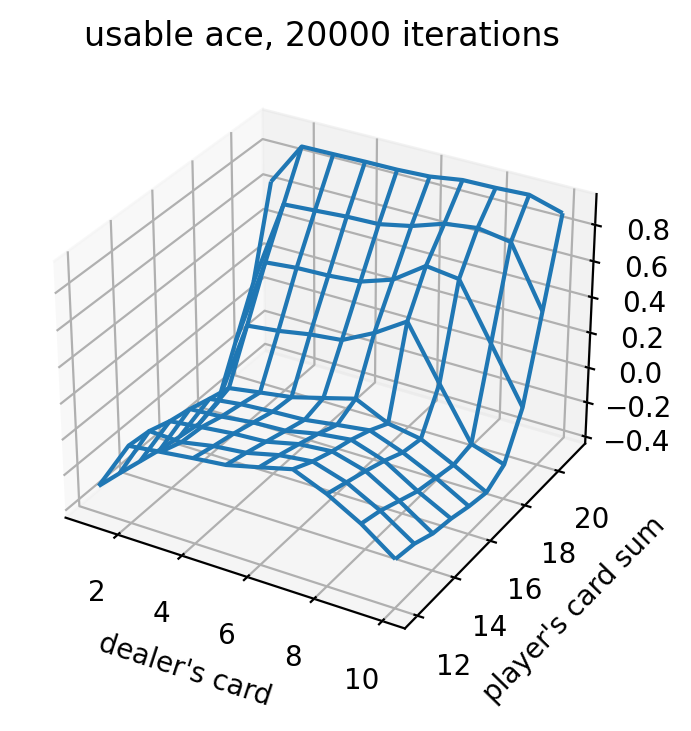

In [12]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
x=np.empty([10,10])
y=np.empty([10,10])
z=np.empty([10,10])
for i in range(12,22):
    for j in range(1,11):
        x[i-12][j-1]=i
        y[i-12][j-1]=j
        z[i-12][j-1]=np.max(q[i][j][1])
# Plot a basic wireframe
ax.plot_wireframe(y, x, z, rstride=1, cstride=1)
plt.xlabel("dealer's card")
plt.ylabel("player's card sum")
plt.title("usable ace, 20000 iterations")

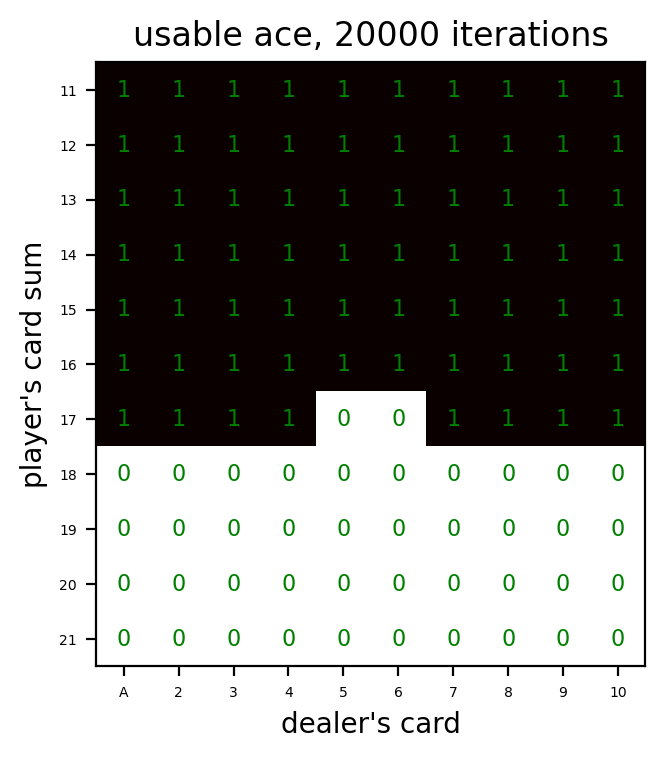

In [34]:
def draw(x,y,heatlist,title,plot_num):
    fig=plt.figure(1,dpi=200)
    ax=fig.add_subplot(111)
    #定义横纵坐标的刻度
    ax.set_xticks(np.arange(len(x)),labels=x,fontsize=5)
    ax.set_yticks(np.arange(len(y)),labels=y,fontsize=5)
    
    im=ax.imshow(heatlist,cmap=plt.cm.hot_r)
    
    for i in range(len(y)):
        for j in range(len(x)):
            text=ax.text(j,i,heatlist[i][j],ha="center",va="center",color="g",fontsize=8)
            
    plt.title(title,fontsize=8)
    plt.xlabel("dealer's card")
    plt.ylabel("player's card sum")
    plt.title("usable ace, 20000 iterations")
#定义热图的横纵坐标
x=["A"]
y=[]
for i in range(2,11):
    x.append(str(i))
for i in range(11,22):
    y.append(i)



title='π'
heatlist=[]
for i in range(11,22):
    l=[]
    for j in range(1,11):
        l.append(np.argmax(q[i][j][1]))
    heatlist.append(l)
d = draw(x,y,heatlist,title+str(i+1),i+1)
    

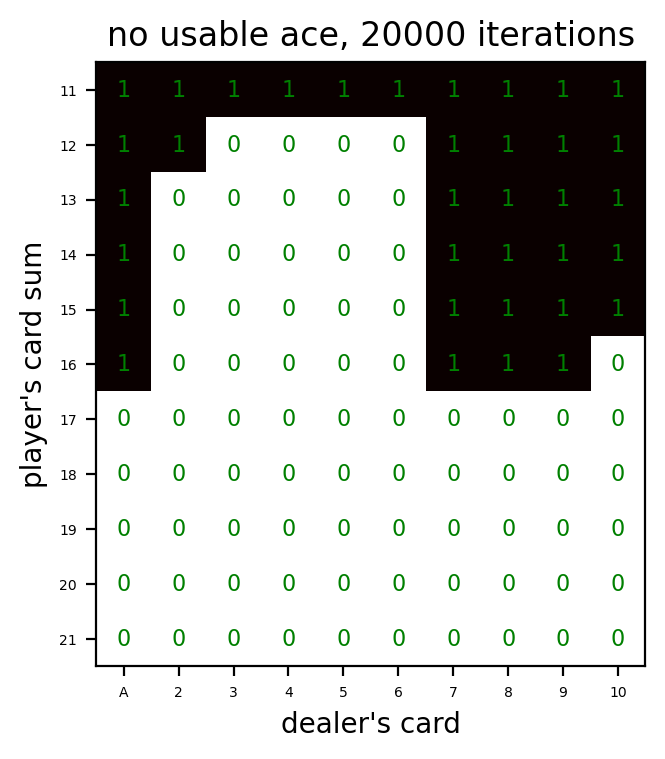

In [36]:
def draw(x,y,heatlist,title,plot_num):
    fig=plt.figure(1,dpi=200)
    ax=fig.add_subplot(111)
    #定义横纵坐标的刻度
    ax.set_xticks(np.arange(len(x)),labels=x,fontsize=5)
    ax.set_yticks(np.arange(len(y)),labels=y,fontsize=5)
    
    im=ax.imshow(heatlist,cmap=plt.cm.hot_r)
    
    for i in range(len(y)):
        for j in range(len(x)):
            text=ax.text(j,i,heatlist[i][j],ha="center",va="center",color="g",fontsize=8)
            
    plt.title(title,fontsize=8)
    plt.xlabel("dealer's card")
    plt.ylabel("player's card sum")
    plt.title("no usable ace, 20000 iterations")
#定义热图的横纵坐标
x=["A"]
y=[]
for i in range(2,11):
    x.append(str(i))
for i in range(11,22):
    y.append(i)



title='π'
heatlist=[]
for i in range(11,22):
    l=[]
    for j in range(1,11):
        l.append(np.argmax(q[i][j][0]))
    heatlist.append(l)
d = draw(x,y,heatlist,title+str(i+1),i+1)
    